In [11]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score

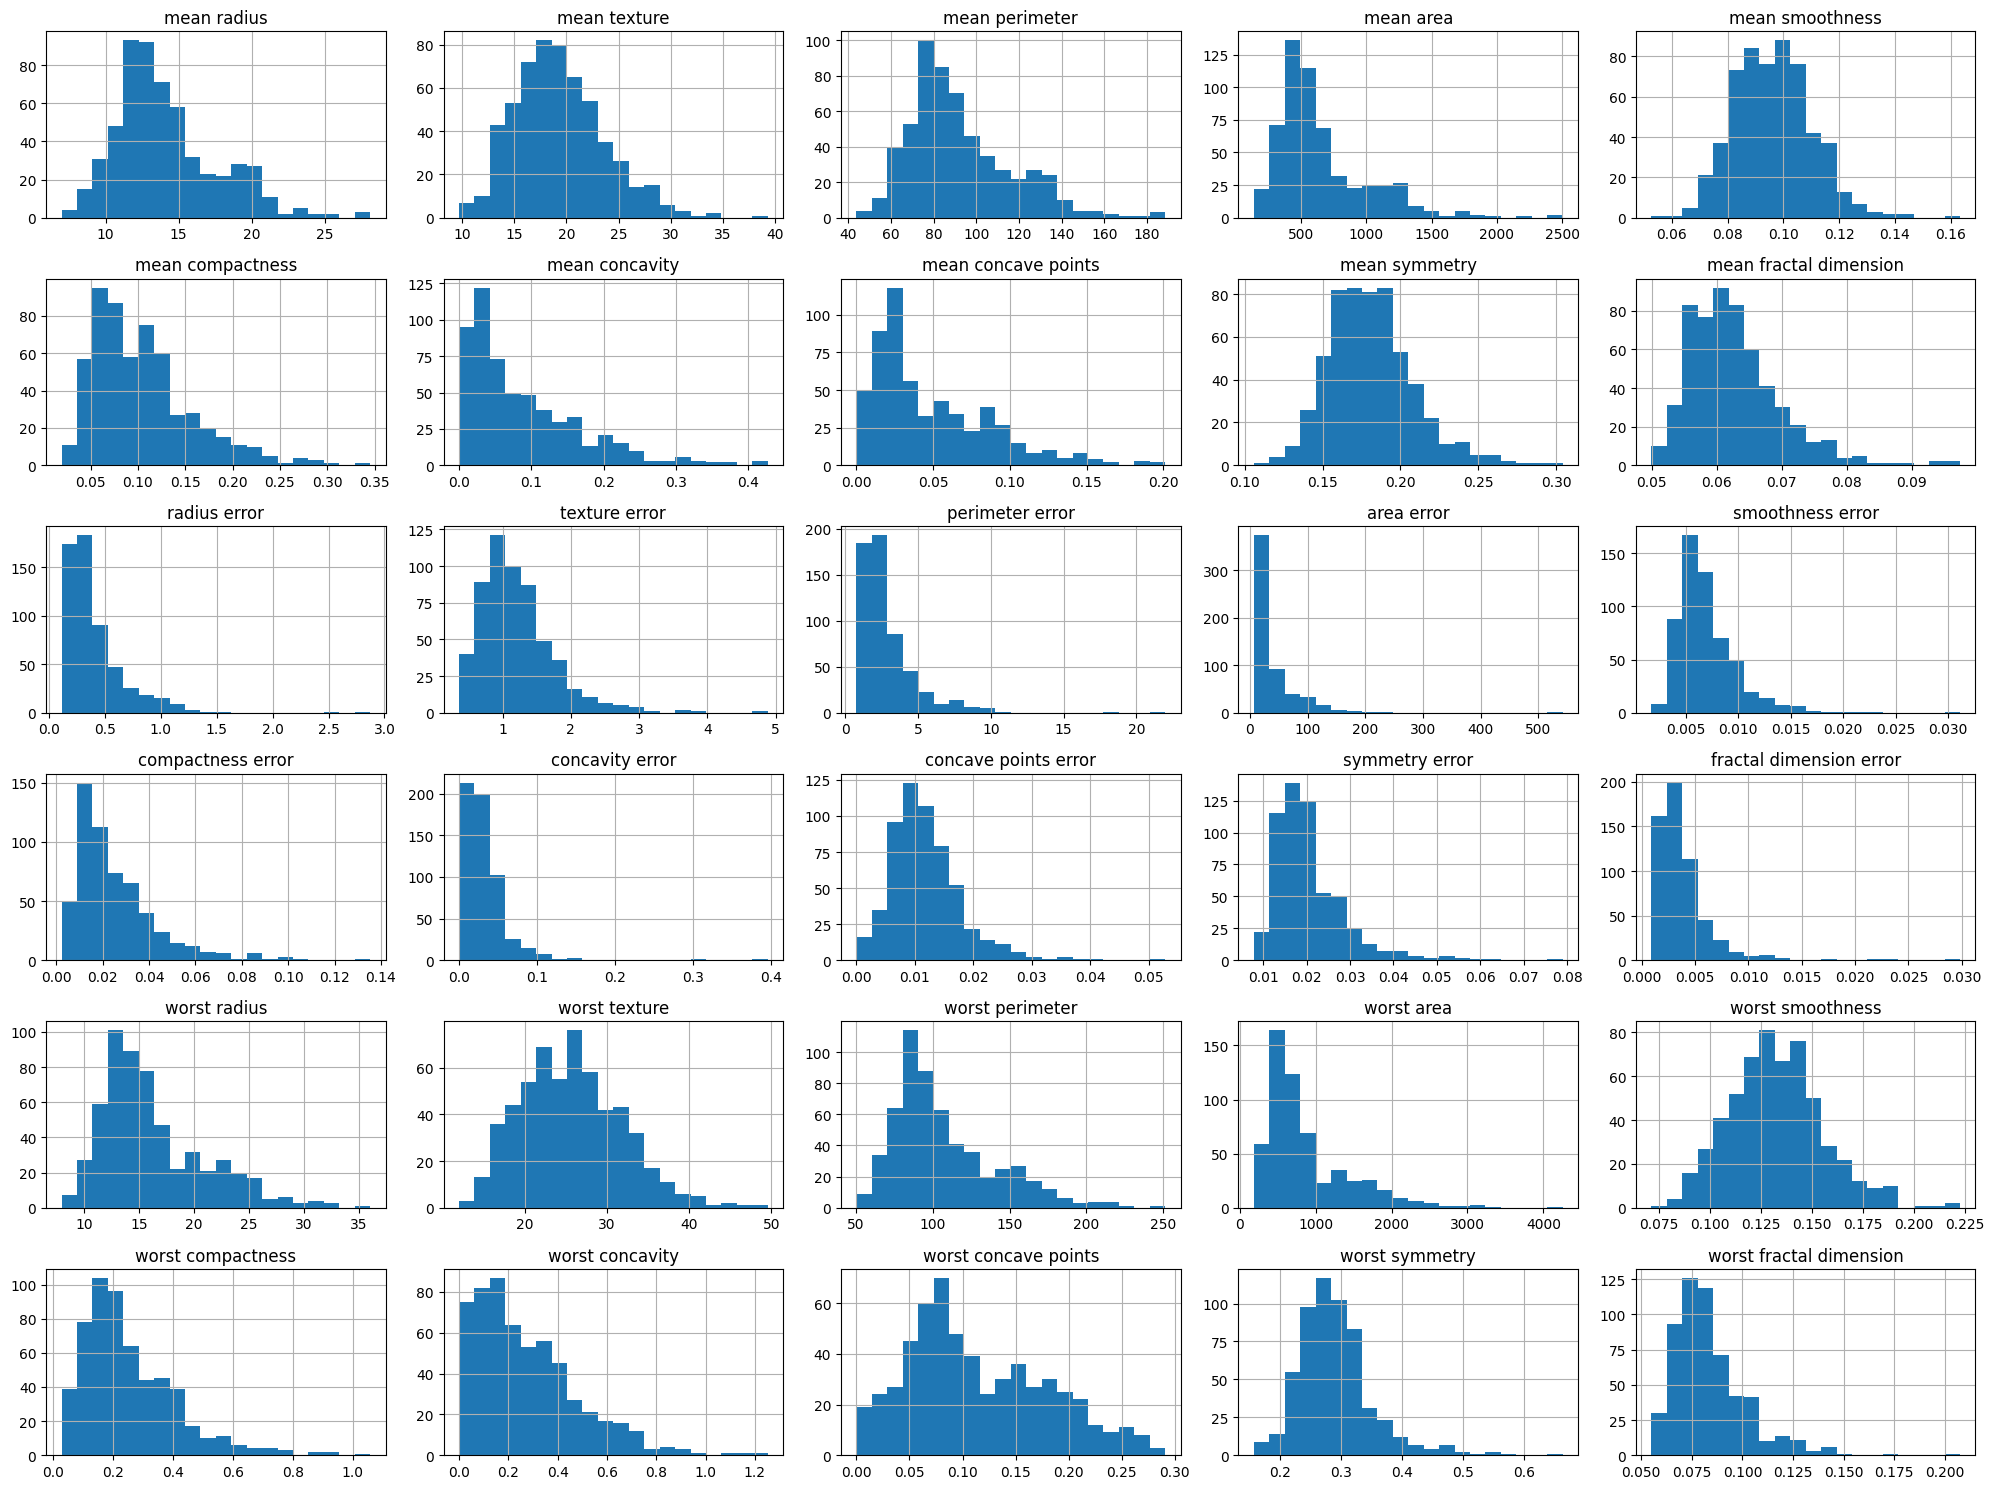

In [4]:


# Загрузка датасета breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Вывод гистограмм распределения непрерывных атрибутов
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns):
    plt.subplot(6, 5, i + 1)
    df[col].hist(bins=20)
    plt.title(col)
plt.tight_layout()
plt.show()


In [5]:
# Выбор первых двух столбцов для признаков и загрузка меток
X = df.iloc[:, :2]
y = data.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание и обучение модели наивного байесовского классификатора
model = GaussianNB()
model.fit(X_train, y_train)

# Предсказание и оценка качества модели
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9005847953216374

In [6]:
# Выбор всех столбцов для признаков
X_full = df
y_full = data.target

# Разделение данных на обучающую и тестовую выборки для полного датасета
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.3, random_state=42)

# Создание и обучение модели наивного байесовского классификатора на полном датасете
model_full = GaussianNB()
model_full.fit(X_train_full, y_train_full)

# Предсказание и оценка качества модели на полном датасете
y_pred_full = model_full.predict(X_test_full)
accuracy_full = accuracy_score(y_test_full, y_pred_full)
accuracy_full


0.9415204678362573

In [8]:
    # Выбор признаков, которые кажутся нормально распределенными
selected_features = ['mean texture', 'mean smoothness', 'mean symmetry']
X_selected = df[selected_features]

# Разделение данных на обучающую и тестовую выборки для выбранных признаков
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y_full, test_size=0.3, random_state=42)

# Создание и обучение модели на выбранных признаках
model_selected = GaussianNB()
model_selected.fit(X_train_selected, y_train_selected)

# Предсказание и оценка качества модели на выбранных признаках
y_pred_selected = model_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test_selected, y_pred_selected)
accuracy_selected


0.783625730994152

In [10]:
# Загрузка данных
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Подготовка данных для Мультономиального и Комплементарного Байеса (неотрицательные значения)
X_abs = df.abs()

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)
X_train_abs, X_test_abs, y_train_abs, y_test_abs = train_test_split(X_abs, y, test_size=0.3, random_state=42)

# Мультономиальный наивный Байес
multinomial_model = MultinomialNB()
multinomial_model.fit(X_train_abs, y_train_abs)
y_pred_multinomial = multinomial_model.predict(X_test_abs)
accuracy_multinomial = accuracy_score(y_test_abs, y_pred_multinomial)

# Бернуллиевский наивный Байес
bernoulli_model = BernoulliNB()
bernoulli_model.fit(X_train, y_train)
y_pred_bernoulli = bernoulli_model.predict(X_test)
accuracy_bernoulli = accuracy_score(y_test, y_pred_bernoulli)

# Комплементарный наивный Байес
complement_model = ComplementNB()
complement_model.fit(X_train_abs, y_train_abs)
y_pred_complement = complement_model.predict(X_test_abs)
accuracy_complement = accuracy_score(y_test_abs, y_pred_complement)

# Вывод результатов
print(f"Точность Мультономиального наивного Байеса: {accuracy_multinomial}")
print(f"Точность Бернуллиевского наивного Байеса: {accuracy_bernoulli}")
print(f"Точность Комплементарного наивного Байеса: {accuracy_complement}")

Точность Мультономиального наивного Байеса: 0.9122807017543859
Точность Бернуллиевского наивного Байеса: 0.631578947368421
Точность Комплементарного наивного Байеса: 0.9122807017543859


In [14]:


# Загрузка данных
titanic_df = pd.read_csv('train_and_test2.csv')

# Удаление колонок с нулевыми значениями и нерелевантных признаков
titanic_df = titanic_df.drop(columns=[col for col in titanic_df.columns if 'zero' in col])

# Обработка пропущенных значений
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
titanic_df['Fare'].fillna(titanic_df['Fare'].mean(), inplace=True)

# Кодирование категориальных переменных
le = LabelEncoder()
titanic_df['Sex'] = le.fit_transform(titanic_df['Sex'])
titanic_df['Embarked'] = le.fit_transform(titanic_df['Embarked'])

# Подготовка признаков и целевой переменной
X = titanic_df[['Age', 'Fare', 'Sex', 'sibsp', 'Pclass', 'Embarked']]
y = titanic_df['2urvived']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Применение различных вариантов наивного байесовского классификатора
models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),
    "CategoricalNB": CategoricalNB() 
}

# Обучение моделей и вывод результатов
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {accuracy}")


GaussianNB accuracy: 0.732824427480916
MultinomialNB accuracy: 0.7213740458015268
BernoulliNB accuracy: 0.7366412213740458
CategoricalNB accuracy: 0.7824427480916031
